# Install mysql-connector-python

In [1]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ------- -------------------------------- 3.1/16.5 MB 18.4 MB/s eta 0:00:01
   ---------------------- ----------------- 9.2/16.5 MB 23.8 MB/s eta 0:00:01
   -------------------------------- ------- 13.4/16.5 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------- 16.5/16.5 MB 20.8 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


# IMPORT DATASET

In [2]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="18.136.157.135",
    port=3306,
    user="dm_team2",
    password="DM!$Team&27@9!20!",
    database="project_sales"
)

# Query your table
query = "SELECT * FROM data"  # your table name
df = pd.read_sql(query, conn)

# Save to CSV
df.to_csv("FicZon_data.csv", index=False)

print("Data exported successfully to FicZon_data.csv")

conn.close()


C:\Users\logil\AppData\Local\Temp\ipykernel_10452\2243736626.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Data exported successfully to FicZon_data.csv


In [ ]:
df.head()

In [ ]:
df.info()

# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NULL CHECKING

In [ ]:
print(df.describe(include='all'))
print(df.isnull().sum())

# UNIQUE VALUES

In [ ]:
df['Product_ID'].unique()

In [ ]:
df['Source'].unique()

In [ ]:
df['Sales_Agent'].unique()

In [ ]:
df['Location'].unique()

In [ ]:
df['Status'].unique()

# Data Preprocessing

## Fill missing values

In [ ]:
for col in ['Product_ID', 'Source', 'Sales_Agent', 'Location']:
    df[col] = df[col].fillna(df[col].mode()[0])

## Drop Mobile and EMAIL 

In [ ]:
df.drop(columns=['Mobile', 'EMAIL'], inplace=True)

## Convert 'Created' to datetime

In [ ]:
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
df['Hour'] = df['Created'].dt.hour
df['Weekday'] = df['Created'].dt.day_name()
df.drop(columns=['Created'], inplace=True)

## Create 'Lead_Category' from Status

## Assuming: Status values mapped like 

In [ ]:
high_potential = ['Open', 'Potential', 'In Progress Positive', 'Just Enquiry', 'Long Term', 'CONVERTED', 'converted']
low_potential = ['Junk Lead', 'Not Responding', 'In Progress Negative', 'LOST']

df = df[df['Status'].isin(high_potential + low_potential)]
df['Lead_Category'] = df['Status'].apply(lambda x: 1 if x in high_potential else 0)

## Encoding Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode']
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

## Target & Features

In [ ]:
X = df.drop(columns=['Status', 'Lead_Category']) 
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(df['Lead_Category'])  # 1 = High, 0 = Low

# Normalizing 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Potential', 'High Potential']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=['Low Potential', 'High Potential']))


## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=['Low Potential', 'High Potential']))


## SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM:")
print(classification_report(y_test, y_pred_svm, target_names=['Low Potential', 'High Potential']))

## K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN:")
print(classification_report(y_test, y_pred_knn, target_names=['Low Potential', 'High Potential']))

## XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=['Low Potential', 'High Potential']))


## Gradient boosting

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb, target_names=['Low Potential', 'High Potential']))


# ACCURACY SCORE

In [ ]:
from sklearn.metrics import accuracy_score

models = {
    "Random Forest": model,
    "Logistic Regression": lr_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "XGBoost": xgb_model,
    "Gradient Boosting": gb_model,
    "Decision Tree": dt_model
}

for name, m in models.items():
    pred = m.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"{name} Accuracy: {acc:.4f}")


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## RandomForest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=3, scoring='accuracy')
grid.fit(X_resampled, y_resampled)
best_model = grid.best_estimator_
print("Best parameters:", grid.best_params_)


In [ ]:
best_rf = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
best_rf.fit(X_train, y_train)

## Classification Report

In [ ]:
y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()


Interpretation:

463 (True Negatives - TN): Model correctly predicted class 0.

533 (True Positives - TP): Model correctly predicted class 1.

290 (False Positives - FP): Model predicted 1, but actual was 0.

199 (False Negatives - FN): Model predicted 0, but actual was 1.

Accuracy:

Overall correct predictions:
463 + 533 = 996

Total samples:
463 + 533 + 290 + 199 = 1,485

Accuracy = 996 / 1485 ≈ 67.1%

## PICKLE

In [ ]:
joblib.dump(best_rf, 'random_forest_best_model.pkl')

# PLOTS

## Distribution of Target Variable

C:\Users\dhanyadha\AppData\Local\Temp\ipykernel_15964\693740318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Lead_Category', palette='pastel')


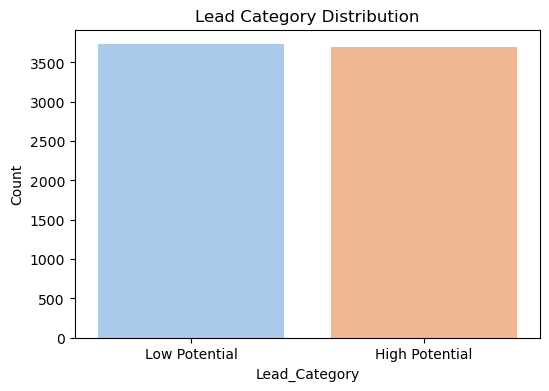

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Lead_Category', palette='pastel')
plt.title('Lead Category Distribution')
plt.xticks([0,1], ['Low Potential', 'High Potential'])
plt.ylabel("Count")
plt.show()

# Bar Plot: Lead Category by Source

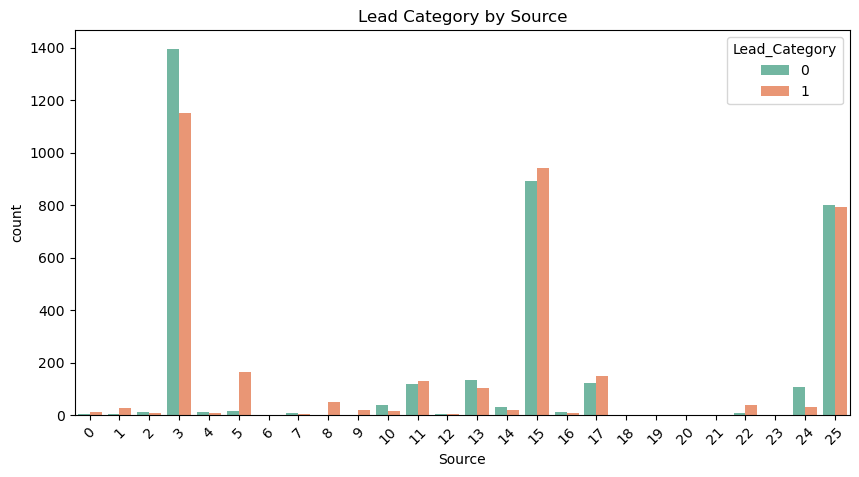

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Source', hue='Lead_Category', palette='Set2')
plt.title('Lead Category by Source')
plt.xticks(rotation=45)
plt.show()

# Bar Plot: Sales Agent vs Lead Category

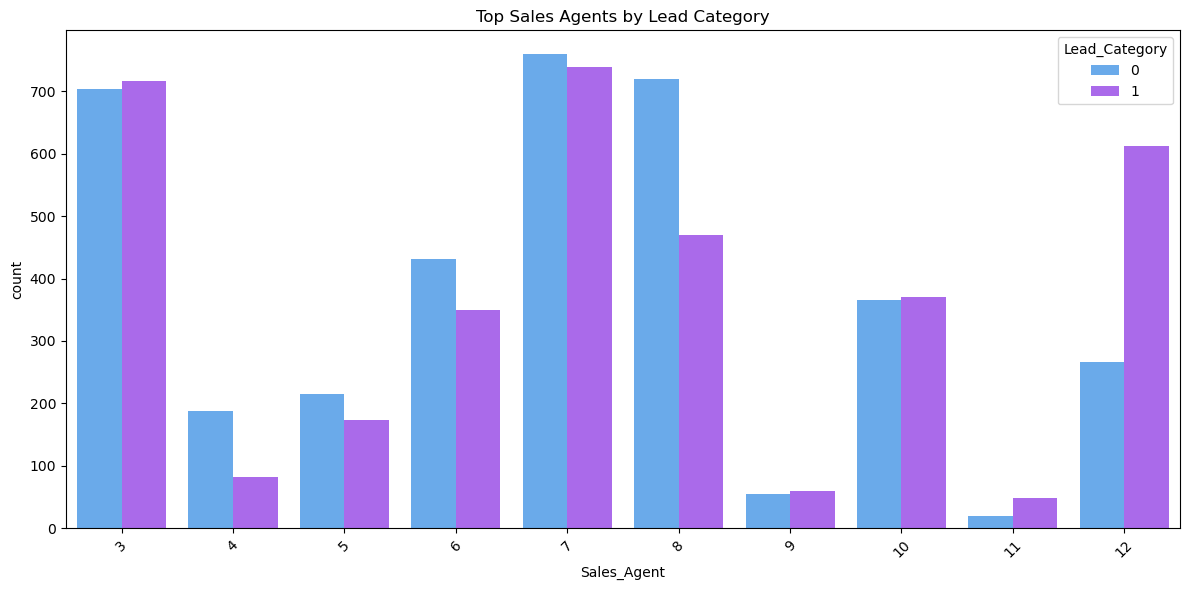

In [82]:
plt.figure(figsize=(12,6))
top_agents = df['Sales_Agent'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Sales_Agent'].isin(top_agents)], x='Sales_Agent', hue='Lead_Category', palette='cool')
plt.title('Top Sales Agents by Lead Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap: Feature Correlation

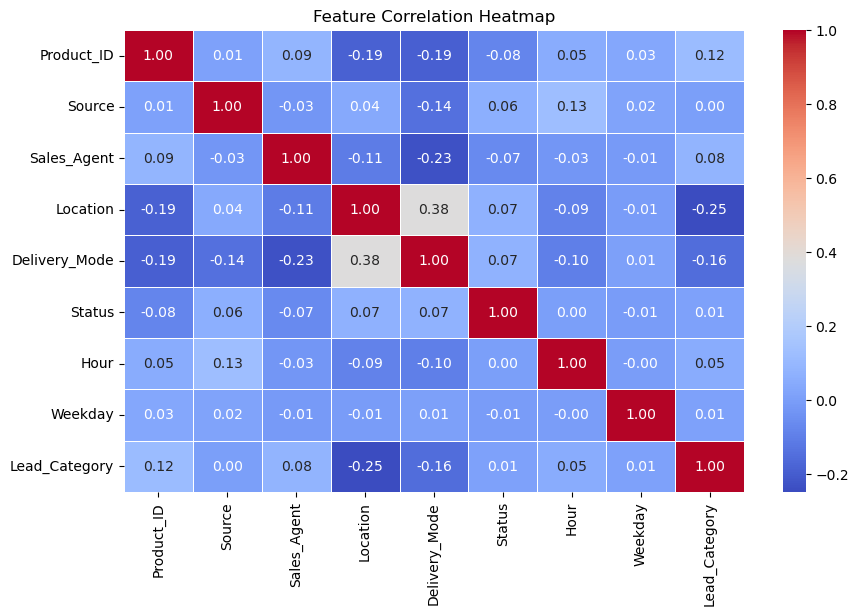

In [83]:
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Heatmap: Feature Correlation

C:\Users\dhanyadha\AppData\Local\Temp\ipykernel_15964\3882118307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lead_Category', y='Hour', data=df, palette='Spectral')


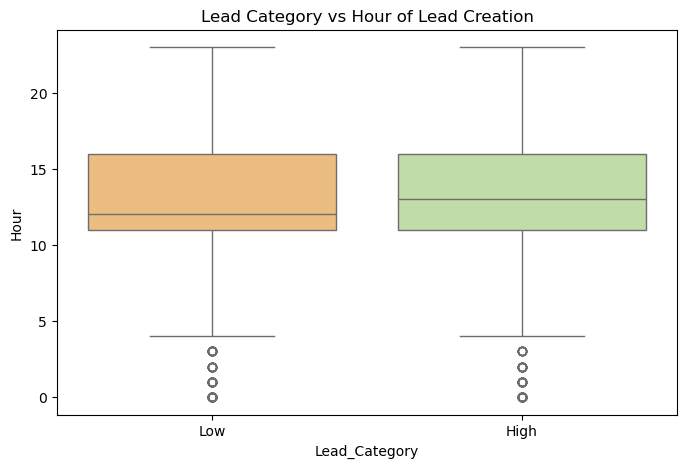

In [84]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Lead_Category', y='Hour', data=df, palette='Spectral')
plt.title('Lead Category vs Hour of Lead Creation')
plt.xticks([0,1], ['Low', 'High'])
plt.show()

# Heatmap: Feature Correlation

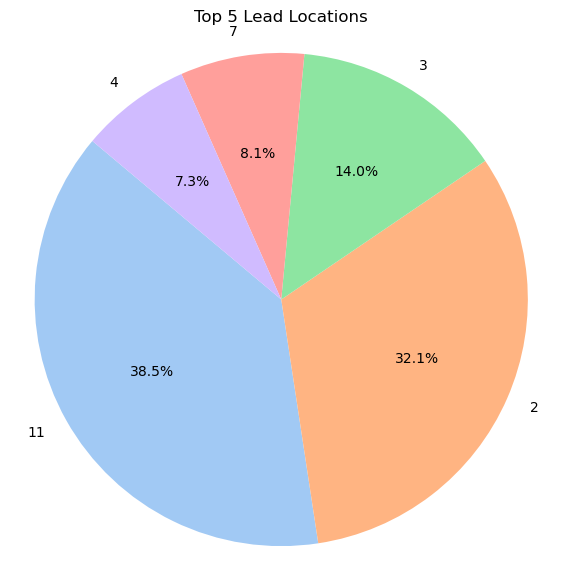

In [85]:
plt.figure(figsize=(7,7))
location_counts = df['Location'].value_counts().nlargest(5)
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Lead Locations')
plt.axis('equal')
plt.show()

# Histogram: Hour Feature

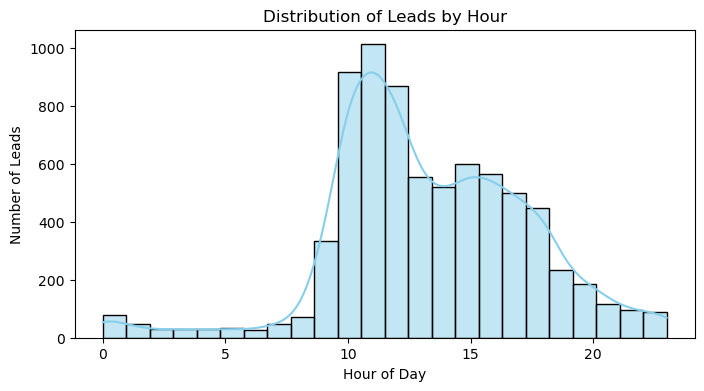

In [86]:
plt.figure(figsize=(8,4))
sns.histplot(df['Hour'], bins=24, kde=True, color='skyblue')
plt.title('Distribution of Leads by Hour')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Leads")
plt.show()

# Pairplot 

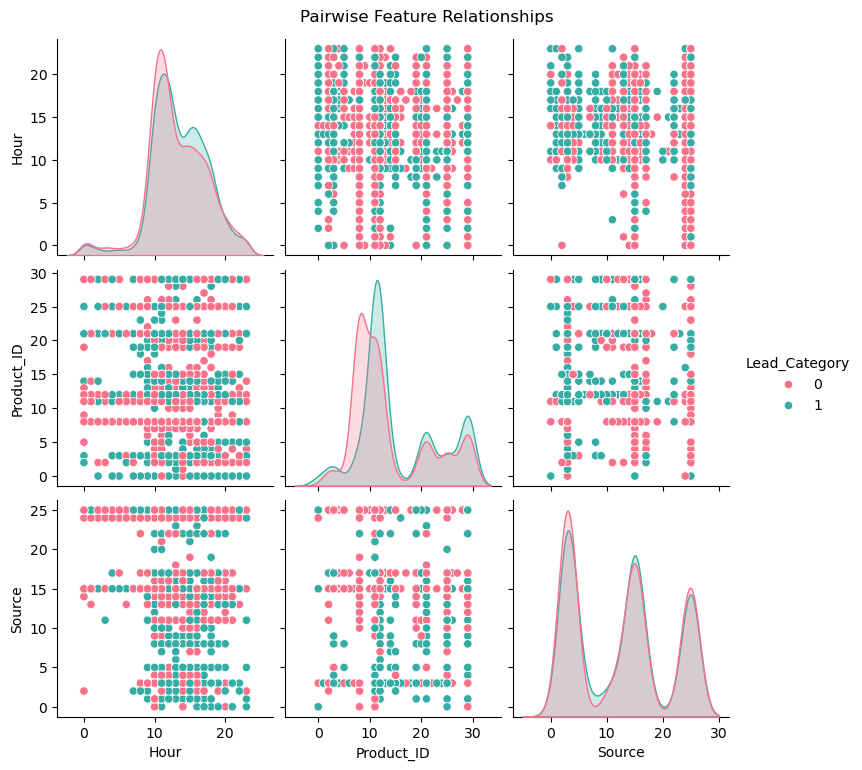

In [87]:
sns.pairplot(df[['Hour', 'Lead_Category', 'Product_ID', 'Source']], hue='Lead_Category', palette='husl')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()